## Barotropic model

The initial pressure situation chosen by Richardson to demostrate a bartropic model is a zonal wavenumber one perturbation given by:

$$p_s=10^4 sin^2\phi\:cos\phi\:sin\lambda$$

Let's represent this perturbation

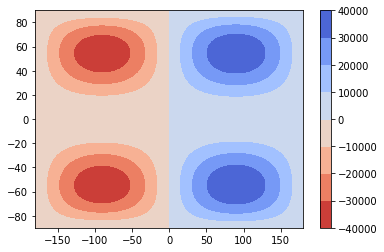

In [58]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

ϕ = np.linspace(90,-90,181)
λ = np.linspace(-180,180,361)

λλ, ϕϕ = np.meshgrid(np.radians(λ),np.radians(ϕ))

ps = 10e4*np.square(np.sin(ϕϕ))*np.cos(ϕϕ)*np.sin(λλ)
plt.contourf(λ,ϕ,ps, cmap='coolwarm_r')
plt.colorbar()

Location of the centre of the high pressure system (Northern hemisphere)

In [50]:
print(ps.min(),ps.max())

max_ϕi, max_λi = np.unravel_index(np.argmax(ps, axis=None), ps.shape)

ϕ[max_ϕi], λ[max_λi]

-38487.556566002866 38487.556566002866


(55.0, 90.0)

$$U=-10^4 \frac{h}{2\Omega a} (2sin^2\phi-cos^2\phi)\:sin\lambda$$
$$V=10^4 \frac{h}{2\Omega a} sin\phi\:cos\lambda$$

-1981835.867231877 1981835.867231877


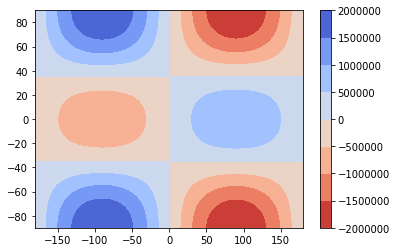

In [60]:
h = 9200

# Earth's angular velocity
Ω2 = 1.458423e-4

# Earth's radius
a = 6.366e6

U = -10e4*(h/(Ω2*a))*(2*np.square(np.sin(ϕϕ))-np.square(np.cos(ϕϕ)))*np.sin(λλ)
plt.contourf(λ,ϕ,U, cmap='coolwarm_r')
plt.colorbar()

print(U.min(),U.max())

To compute the tendency, we need the divergence on the black squares. For this, we require the zonal wind in the white squares to the east and west, and the meridional wind in the white squares to the north and south of each black square.

$$\frac{\partial P}{\partial t} + gh \nabla \cdot V = 0$$

$$\frac{\partial P}{\partial t} + \frac{gh}{a\:cos\phi} \left(\frac{\Delta U}{\Delta \lambda}+\frac{\Delta (V cos \phi)}{\Delta \phi}\right)=0$$

In [55]:
# Gravitational acceleration
g = 9.79

# Earth's angular velocity
Ω = 1.458423e-4/2

# Earth's radius
a = 6.366e6

λ0 = 0
ϕ0 = 50.4

Δλ = 5.625
Δϕ = 3.6

Δt = 2700 #3/4 hour

ϕ = np.radians(np.array([ϕ0+Δϕ/2, ϕ0, ϕ0-Δϕ/2]))
cosϕ = np.cos(ϕ)

#λ = np.radians(np.array([λ0-Δλ, λ0, λ0+Δλ]))

cosϕ[0]

0.6129070536529766

In [2]:
Ue = -1064.44
Uw = 1064.44

ΔU = Ue - Uw

ΔU/np.radians(Δλ)

-21684.593615966347

In [3]:
Vn = 78295.45
Vs = 74327.53

(Vn*cosϕ[0]-Vs*cosϕ[2])/np.radians(Δϕ)

-18554.98251712508

In [4]:
divV = (1/(a*cosϕ[1])) * (ΔU/np.radians(Δλ) + (Vn*cosϕ[0]-Vs*cosϕ[2])/np.radians(Δϕ))

divV

-0.009916498688737384

In [35]:
δp = -g*divV

Δp = δp*Δt/100
Δp # hPa

2.6212280983939524